In [6]:
#importing libraries and data
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv("adult_census_data.csv")

In [7]:
print(df.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


In [8]:
df_filtered = df.loc[:, df.columns.isin([' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical', 
                         ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K'])]
print(df_filtered.columns)


Index([' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical',
       ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K'],
      dtype='object')


In [9]:
# renaming headers
df_filtered.is_copy = None
df_filtered.rename(columns={' State-gov':'Employment Type', ' Bachelors':'Degree Status', ' Never-married':'Marriage-Status', ' Adm-clerical':'Job-Role',
       ' Not-in-family':'Family-Role', ' White':'Ethnicity', ' Male':'Gender', ' United-States':'Country', ' <=50K':'Earnings'}, inplace=True)
print(df_filtered.columns)

Index(['Employment Type', 'Degree Status', 'Marriage-Status', 'Job-Role',
       'Family-Role', 'Ethnicity', 'Gender', 'Country', 'Earnings'],
      dtype='object')


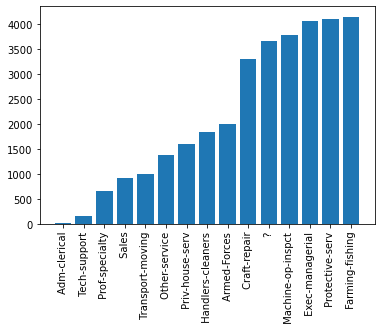

In [10]:
x = list(set(df_filtered['Job-Role']))
y = df_filtered['Job-Role'].value_counts(sort=True, ascending=True)
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.show()

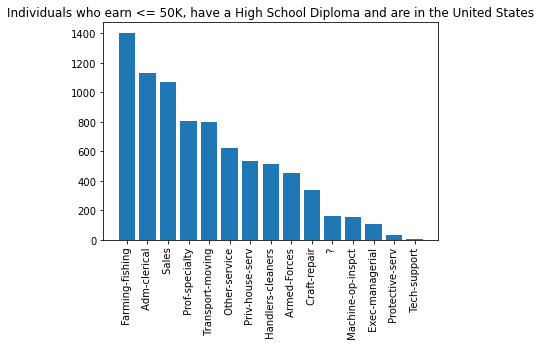

In [11]:
df_filteredLT = df_filtered[(df_filtered['Earnings'] == " <=50K") & (df_filtered['Degree Status'] == " HS-grad") & (df_filtered['Country'] == " United-States")]

x = list(set(df_filteredLT['Job-Role']))
y = df_filteredLT['Job-Role'].value_counts(sort=True)
plt.bar(x, y)
plt.title('Individuals who earn <= 50K, have a High School Diploma and are in the United States')
plt.xticks(rotation = 90)
plt.show()

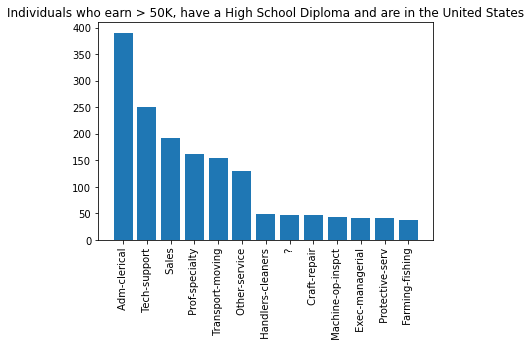

In [12]:
df_filteredGT = df_filtered[(df_filtered['Earnings'] == " >50K") & (df_filtered['Degree Status'] == " HS-grad") & (df_filtered['Country'] == " United-States")]

x = list(set(df_filteredGT['Job-Role']))
y = df_filteredGT['Job-Role'].value_counts(sort=True)
plt.bar(x, y)
plt.title('Individuals who earn > 50K, have a High School Diploma and are in the United States')
plt.xticks(rotation = 90)
plt.show()

In [13]:
greaterThan50 = df_filtered[df_filtered['Earnings'] == " >50K"]
roleGT50 = greaterThan50['Job-Role'].value_counts()
roleTotal = df_filtered['Job-Role'].value_counts()
proportions = (roleGT50/roleTotal).sort_values(ascending=False)

print(proportions)

 Exec-managerial      0.484014
 Prof-specialty       0.449034
 Protective-serv      0.325116
 Tech-support         0.304957
 Sales                0.269315
 Craft-repair         0.226641
 Transport-moving     0.200376
 Adm-clerical         0.134518
 Machine-op-inspct    0.124875
 Farming-fishing      0.115694
 Armed-Forces         0.111111
 ?                    0.103635
 Handlers-cleaners    0.062774
 Other-service        0.041578
 Priv-house-serv      0.006711
Name: Job-Role, dtype: float64
